<a href="https://colab.research.google.com/github/Nadia147/Machine_learning_/blob/main/HSI_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


! pip install earthpy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm
import scipy.io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#S=scipy.io.loadmat('/content/drive/My Drive/burgers_shock.mat')
import scipy.io
data =scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/PaviaU.mat')['paviaU'];

gt = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/PaviaU_gt.mat')['paviaU_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

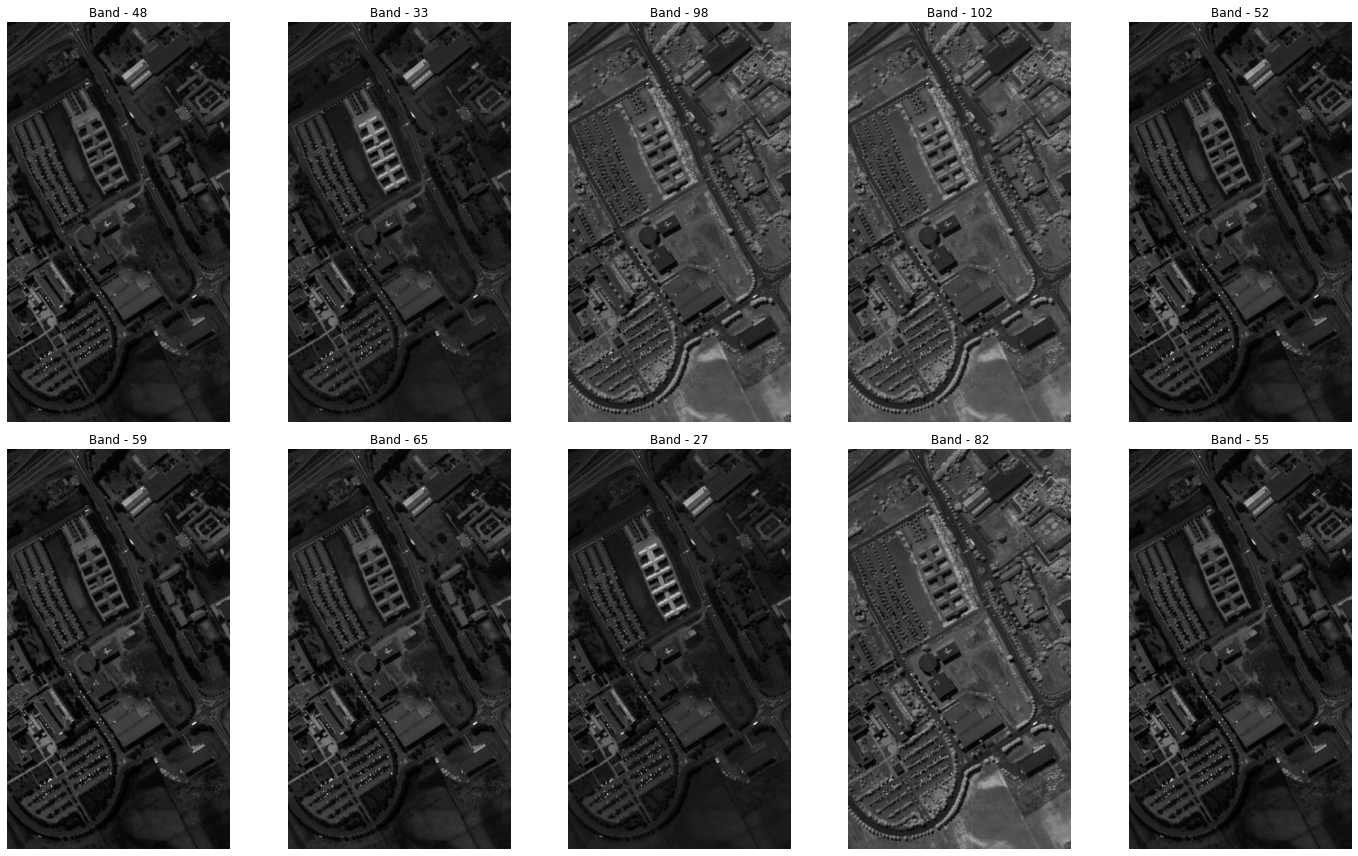

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()

plt.show()

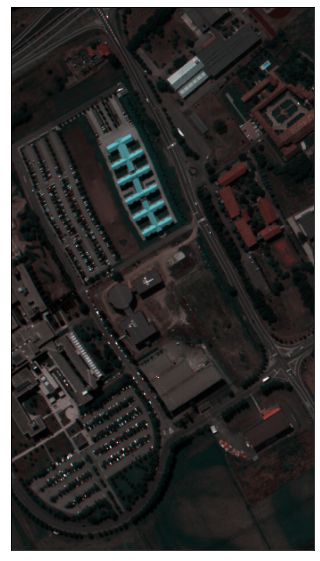

In [ ]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10)) 

plt.show()

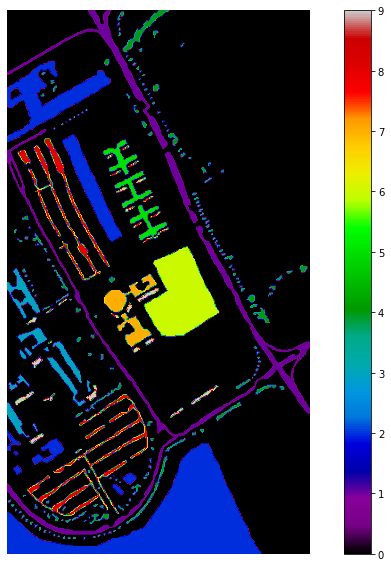

In [ ]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)

In [ ]:


X = df[df['class']!=0].iloc[:, :-1].values

y = tf.keras.utils.to_categorical(df[df['class']!=0].iloc[:, -1].values , 
                                  num_classes= np.unique(gt).shape[0], 
                                  dtype='float32') 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")



Train Data: (29943, 103)
Test Data: (12833, 103)


In [ ]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = X_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization(name = 'BatchNormalization'))

model.add(Dense(units = 128, activation= 'relu', name = 'Layer1'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer2'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer3'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer4'))

model.add(Dropout(rate = 0.2, name = 'Dropout1',))

model.add(Dense(units = 64, activation= 'relu', name = 'Layer5'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer6'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer7'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer8'))

model.add(Dropout(rate = 0.2, name = 'Dropout2'))

model.add(Dense(units = 32, activation= 'relu', name = 'Layer9'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer10'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer11'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer12'))

model.add(Dense(units = y_train.shape[1], activation= 'softmax', name = 'Output_Layer'))

model.summary()

Model: "Pavia_University"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization (BatchNo  (None, 103)              412       
 rmalization)                                                    
                                                                 
 Layer1 (Dense)              (None, 128)               13312     
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Layer3 (Dense)              (None, 128)               16512     
                                                                 
 Layer4 (Dense)              (None, 128)               16512     
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                  

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5', 
                             monitor = 'val_loss', 
                             mode ='min', 
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_test, y_test), 
          epochs = 100,
          callbacks = [es, checkpoint])

Epoch 1/100
932/936 [============================>.] - ETA: 0s - loss: 0.8194 - accuracy: 0.7012
Epoch 1: val_loss improved from inf to 0.53657, saving model to Pavia_University_Model.h5
936/936 [==============================] - 19s 14ms/step - loss: 0.8194 - accuracy: 0.7012 - val_loss: 0.5366 - val_accuracy: 0.7791
Epoch 2/100
933/936 [============================>.] - ETA: 0s - loss: 0.5674 - accuracy: 0.7841
Epoch 2: val_loss improved from 0.53657 to 0.43818, saving model to Pavia_University_Model.h5
936/936 [==============================] - 7s 8ms/step - loss: 0.5675 - accuracy: 0.7841 - val_loss: 0.4382 - val_accuracy: 0.8216
Epoch 3/100
935/936 [============================>.] - ETA: 0s - loss: 0.5110 - accuracy: 0.8076
Epoch 3: val_loss improved from 0.43818 to 0.40947, saving model to Pavia_University_Model.h5
936/936 [==============================] - 5s 6ms/step - loss: 0.5112 - accuracy: 0.8075 - val_loss: 0.4095 - val_accuracy: 0.8221
Epoch 4/100
933/936 [===============

In [ ]:
hist = pd.DataFrame(data= history.history)

fig = go.Figure()

fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
                    mode='lines+markers',
                    name='Train Loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
                    mode='lines+markers',
                    name='Train Accuracy'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_loss.values,
                    mode='lines+markers', name='Test loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_accuracy.values,
                    mode='lines+markers', name='Test Accuracy'))

fig.show()

In [ ]:
pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 3.5 MB/s eta 0:00:00


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils

from keras.layers.convolutional import *
from keras.utils import conv_utils
from keras.layers.core import *
from keras.utils.layer_utils import get_source_inputs
from keras.engine.topology import Layer

import numpy as np
import scipy.io as sio
import random
from random import shuffle
import matplotlib.pyplot as plt

import os.path
import errno

import spectral
import scipy.ndimage
from skimage.transform import rotate

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF


# Global Variables
numComponents = 35
windowSize = 5
testRatio = 0.25
lr = 0.0001
isPCA = True
PATCH_SIZE = 5

def loadIndianPinesData():
    data_path = os.path.join(os.getcwd(),'data')
    data = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/PaviaU.mat')['paviaU'];#sio.loadmat(os.path.join(data_path, 'Indian_pines.mat'))['indian_pines']
    labels = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/PaviaU_gt.mat')['paviaU_gt']#sio.loadmat(os.path.join(data_path, 'Indian_pines_gt.mat'))['indian_pines_gt']
    return data, labels

def splitTrainTestSet(X, y, testRatio=0.10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=345,
                                                        stratify=y)
    return X_train, X_test, y_train, y_test

def oversampleWeakClasses(X, y):
    uniqueLabels, labelCounts = np.unique(y, return_counts=True)
    maxCount = np.max(labelCounts)
    labelInverseRatios = maxCount / labelCounts  
    # repeat for every label and concat
    newX = X[y == uniqueLabels[0], :, :, :].repeat(round(labelInverseRatios[0]), axis=0)
    newY = y[y == uniqueLabels[0]].repeat(round(labelInverseRatios[0]), axis=0)
    for label, labelInverseRatio in zip(uniqueLabels[1:], labelInverseRatios[1:]):
        cX = X[y== label,:,:,:].repeat(round(labelInverseRatio), axis=0)
        cY = y[y == label].repeat(round(labelInverseRatio), axis=0)
        newX = np.concatenate((newX, cX))
        newY = np.concatenate((newY, cY))
    np.random.seed(seed=42)
    rand_perm = np.random.permutation(newY.shape[0])
    newX = newX[rand_perm, :, :, :]
    newY = newY[rand_perm]
    return newX, newY

def standartizeData(X):
    newX = np.reshape(X, (-1, X.shape[2]))
    scaler = preprocessing.StandardScaler().fit(newX)  
    newX = scaler.transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1],X.shape[2]))
    return newX, scaler

def applyNMF(X, numComponents=75):
    nmf = NMF(n_components=numComponents, init='random', random_state=0)
    newX = nmf.fit_transform(X)
    return newX, nmf

def applyPCA(X, numComponents=75, isReshape = True, drawPlot = False, layerNo = 1):
    if isReshape == True:
        newX = np.reshape(X, (-1, X.shape[2]))
        pca = PCA(n_components=numComponents, whiten=True)
        newX = pca.fit_transform(newX)
        newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    else: 
        pca = PCA(n_components=numComponents, svd_solver='full')
        newX = pca.fit_transform(X)
        if drawPlot == True:
            drawPCAPlot(pca.explained_variance_ratio_,numComponents, layerNo)
    return newX, pca

def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

def createPatches(X, y, windowSize=5):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]   
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1    
    patchesData = patchesData[patchesLabels>0,:,:,:]
    patchesLabels = patchesLabels[patchesLabels>0]
    patchesLabels -= 1
    return patchesData, patchesLabels

def Patch(data,height_index,width_index):
    height_slice = slice(height_index, height_index+PATCH_SIZE)
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    return patch

def AugmentData(X_train):
    for i in range(int(X_train.shape[0]/2)):
        patch = X_train[i,:,:,:]
        num = random.randint(0,2)
        if (num == 0):
            
            flipped_patch = np.flipud(patch)
        if (num == 1):
            
            flipped_patch = np.fliplr(patch)
        if (num == 2):
            
            no = random.randrange(-180,180,30)
            flipped_patch = scipy.ndimage.interpolation.rotate(patch, no,axes=(1, 0),
                                                               reshape=False, output=None, order=3, mode='constant', cval=0.0, prefilter=False)  
    patch2 = flipped_patch
    X_train[i,:,:,:] = patch2
    return X_train

def getModel(input_shape, numComponents):
    model = Sequential()
    model.add(Conv2D(numComponents, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(numComponents, (3, 3)))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(2*numComponents))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16))
    model.add(Activation('softmax'))
    return model

def obtain_pcaplot(model):
    for idx, layer in enumerate(model.layers):
        if layer.__class__.__name__ == "Dense":
            all_weights = layer.get_weights()
            weights = all_weights[0]
            pca = applyPCA(weights, np.array(weights).shape[1], drawPlot= True, isReshape = False)
            break
            
def drawPCAPlot(eigval, numComponents, layerNo = 1):
    x = list(range(1,numComponents+1))
    y = np.cumsum(eigval)
    xlabel = 'k'
    ylabel = "Explained Variance Ratio"
    title = "Explained Variance Ratio versus Rank"
    filename = ("PCAofDenseLayer" + str(layerNo) + ".png")
    drawPlot(x, y, xlabel, ylabel, title, filename)

def drawPlot(x, y, xlabel, ylabel, title, filename,  isSave=True, isShow=False):  
    fig,ax = plt.subplots()
    ax.plot(x, y)
    ax.title.set_text(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if isSave == True:
        fig.savefig(filename)
    if isShow == True:
        plt.show()

def prepareWeights(weights, k=0):
    if k == 0:
        k = weights.shape[0]
    u, s, vh = np.linalg.svd(weights, full_matrices=True)
    smat = np.zeros((u.shape[1], vh.shape[0]))
    smat[:vh.shape[1], :vh.shape[1]] = np.diag(s)
    A = np.dot(u,smat)[:,:k]
    B = vh[:k,:]
    return A, B

def compressLayer(model, numComponents, layerNo, isUniform = True):
    pca_model = Sequential()
    for idx, layer in enumerate(model.layers):
        if idx in layerNo and layer.__class__.__name__ == "Dense":
            k = 10
            if isUniform == True:
                k = numComponents[0]
            else:
                k = numComponents[idx]
            weights = layer.get_weights()
            A,B = prepareWeights(weights[0], k)
            pca_model.add(Dense(k, weights = [A, np.zeros((k))], name = (layer.name+"_1")))
            pca_model.add(Dense(layer.output_shape[1], weights = [B, weights[1]], name = (layer.name+"_2")))
        else:
            pca_model.add(layer)
    return pca_model   

def getClassificationImages(model, X, y, filename, PATCH_SIZE=5, isSave = True, isShow = False):
    height = y.shape[0]
    width = y.shape[1]
    outputs = np.zeros((height,width))
    for i in range(height-PATCH_SIZE+1):
        for j in range(width-PATCH_SIZE+1):
            target = int(y[i+int(PATCH_SIZE/2), j+int(PATCH_SIZE/2)])
            if target == 0 :
                continue
            else :
                image_patch=Patch(X,i,j)
                X_test_image = image_patch.reshape(1,image_patch.shape[2],image_patch.shape[0],image_patch.shape[1]).astype('float32')                                   
                prediction = (model.predict_classes(X_test_image))                         
                outputs[i+int(PATCH_SIZE/2)][j+int(PATCH_SIZE/2)] = prediction+1
    if isSave == True:
        spectral.save_rgb(filename, data= outputs.astype(int), colors=spectral.spy_colors)
    if isShow == True:
        predict_image = spectral.imshow(classes = outputs.astype(int), figsize =(5,5))

X, y = loadIndianPinesData()

# PCA
if isPCA == True:
    X,pca = applyPCA(X,numComponents=numComponents)

# NMF
elif isPCA == False:
    X = X.reshape((145*145,220))
    X, nmf = applyNMF(X,numComponents)
    X = X.reshape((145,145,numComponents))

XPatches, yPatches = createPatches(X, y, windowSize=windowSize)

X_train, X_test, y_train, y_test = splitTrainTestSet(XPatches, yPatches, testRatio)

X_train, y_train = oversampleWeakClasses(X_train, y_train)

X_train = AugmentData(X_train)

X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[3], X_test.shape[1], X_test.shape[2]))
y_test = np_utils.to_categorical(y_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[3], X_train.shape[1], X_train.shape[2]))
y_train = np_utils.to_categorical(y_train)

model = getModel(X_train[0].shape, numComponents*3)
opt = keras.optimizers.Adam(lr=lr,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=15)
scores = model.evaluate(X_test, y_test, batch_size=100)

ground_truth = spectral.imshow(classes = y,figsize =(5,5))
if isPCA == True:
    getClassificationImages(model, X, y, filename = "PCAVanillaClassification.png", PATCH_SIZE=5)
elif isPCA == False:
    getClassificationImages(model, X, y, filename = "NMFVanillaClassification.png", PATCH_SIZE=5)


## LAYER COMPRESSION - EXPERIMENTS

data1 = []
data2 = []
klist = [2,5,10,25,50,75,100,150]
for k in klist:
    pca_model = compressLayer(model, [k], [7])
    opt = keras.optimizers.Adam(lr=lr)
    pca_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    data1.append(pca_model.evaluate(X_test, y_test, verbose=1)[1])
    getClassificationImages(pca_model, X, y, filename = ("FirstDenseLayerCompressedby_"+ str(k) + "_Untrained.png"), PATCH_SIZE=5)
    history = pca_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10, shuffle=True)
    data2.append(pca_model.evaluate(X_test, y_test, verbose=1)[1])
    getClassificationImages(pca_model, X, y, filename = ("FirstDenseLayerCompressedby_"+ str(k) + "_Trained.png"), PATCH_SIZE=5)

title = "Accuracy vs rank - Without Retraining"
ylabel = "Accuracy"
xlabel = "rank"
filename = "FirstDenseLayerCompressed_UntrainedPlot.png"
drawPlot(klist, data1, xlabel, ylabel, title, filename)

title = "Accuracy vs rank - With Retraining"
ylabel = "Accuracy"
xlabel = "rank"
filename = "FirstDenseLayerCompressed_TrainedPlot.png"
drawPlot(klist, data2, xlabel, ylabel, title, filename)

com = [k*(2430+180) for k in klist]
title = "Accuracy vs rank - With Retraining"
ylabel = "Accuracy"
xlabel = "Parameters"
filename = "FirstDenseLayerCompressed_Param_TrainedPlot.png"
drawPlot(com, data2, xlabel, ylabel, title, filename)

print("With matrix factorization the complexity is kx(2430+180)")
print("The complexity without compression is 2430x180!")

## PRUNING 

weights_path = "weights_path"
model = getModel(X_train[0].shape, numComponents*3)
opt = keras.optimizers.Adam(lr=lr,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=15)
scores = model.evaluate(X_test, y_test, batch_size=100)
model.save_weights(weights_path)

class pruned_Dense(Layer):
    def __init__(self, n_neurons_out, **kwargs):
        self.n_neurons_out = n_neurons_out
        super(pruned_Dense,self).__init__(**kwargs)
    def build(self, input_shape):
        n_neurons_in = input_shape[1]
        stdv = 1/np.sqrt(n_neurons_in)
        w = np.random.normal(size=[n_neurons_in, self.n_neurons_out], loc=0.0, scale=stdv).astype(np.float32)
        self.w = K.variable(w)
        b = np.zeros(self.n_neurons_out)
        self.b = K.variable(b)
        self.trainable_weights = [self.w, self.b]
        mask = np.ones((n_neurons_in, self.n_neurons_out))
        self.mask = K.variable(mask)     
    def call(self, x):
        pruned_w = self.w * self.mask
        out = K.dot(x, pruned_w)
        out = out + self.b
        return out    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.n_neurons_out)
    def get_mask(self):
        return K.get_value(self.mask)
    def set_mask(self, mask):
        K.set_value(self.mask, mask)

def convert_to_masked_model(model):   
    new_model = Sequential()
    for idx, layer in enumerate(model.layers):
        if layer.__class__.__name__ == "Dense":
            new_model.add(pruned_Dense(n_neurons_out = layer.output_shape[-1], input_shape = [layer.input_shape]))
        else:
            new_model.add(layer)
    return new_model

def get_idx_prune(weights,percent_pruning):
    num_weights_to_prune = int(percent_pruning / 100.0 * (weights.size))
    idx_prune = np.argpartition(weights,num_weights_to_prune, axis = None)[:num_weights_to_prune]
    idx_prune = np.unravel_index(idx_prune, weights.shape)
    return idx_prune

def prune_layer(layer, percent_pruning):
    weights = layer.get_weights()[0]
    weights = np.array(weights, dtype=np.float32)
    mask = layer.get_mask()
    idx_prune = get_idx_prune(np.fabs(weights), percent_pruning)
    mask[idx_prune] = 0
    layer.set_mask(mask)
    return layer

def reset_model():
    model = getModel(X_train[0].shape, numComponents*3)
    prunable_model = convert_to_masked_model(model)
    prunable_model.load_weights(weights_path)
    opt = keras.optimizers.Adam(lr=lr,decay=1e-6)
    prunable_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    return prunable_model

def prune_model(model, percent_pruning):
    for layer_idx, layer in enumerate(model.layers):
        if(layer.__class__.__name__ == "pruned_Dense"):
            model.layers[layer_idx] = prune_layer(layer, percent_pruning)
    return model


data1 = []
data2 = []
klist = [10,20,30,40,50,60,70,80,90,95,98]
for k in klist:
    print(k)
    model = reset_model()
    model = prune_model(model, k)
    opt = keras.optimizers.Adam(lr=lr,decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    data1.append(model.evaluate(X_test, y_test, verbose=1)[1])
    getClassificationImages(model, X, y, filename = ("DenseLayersUniformlyPrunedby"+ str(k) + "_Untrained.png"), PATCH_SIZE=5)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10, shuffle=True)
    data2.append(model.evaluate(X_test, y_test, verbose=1)[1])
    getClassificationImages(model, X, y, filename = ("DenseLayersUniformlyPrunedby"+ str(k) + "_Trained.png"), PATCH_SIZE=5)
drawPlot(klist, data1, "Pruning Rate", "Accuracy", "Accuracy vs Pruning Rate - Without Retraining", "DenseLayersUniformlyPruned_UntrainedPlot.png")
drawPlot(klist, data2, "Pruning Rate", "Accuracy", "Accuracy vs Pruning Rate - With Retraining", "DenseLayersUniformlyPruned_TrainedPlot.png")

<ipython-input-10-c1e3aca153e0>:140: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  flipped_patch = scipy.ndimage.interpolation.rotate(patch, no,axes=(1, 0),
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15


ValueError: ignored